# Load Dataset

In [1]:
import pandas as pd
data = pd.read_csv("first_half_logs.csv", header=None,\
                   names=["timestamp", "tag_id", "x_pos", "y_pos", "heading", "direction", "energy", "speed","total_distance"])

# a

In [2]:
data_pos_mean = data.groupby("tag_id").mean()[["x_pos", "y_pos"]]
data_pos_mean = data_pos_mean.reset_index()

In [3]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def plot_background(axs, colorfull):
    
    rect1=Rectangle((0, 0), 105, 68, fill=colorfull, color="green", alpha=0.7,linewidth=2)
    rect2=Rectangle((0, 17), 15, 34, fill=False, color="black", alpha=0.5,linewidth=2)
    rect3=Rectangle((105-15, 17), 15, 34, fill=False, color="black", alpha=0.5,linewidth=2)

    axs.add_patch(rect1)
    axs.add_patch(rect2)
    axs.add_patch(rect3)

    axs.plot([52.5, 52.5], [0,68], color="black", alpha=0.5)
    axs.plot([0, 105], [68, 68], color="black")
    axs.plot([0, 105], [0, 0], color="black")
    axs.plot([0, 0], [0, 68], color="black")
    axs.plot([105, 105], [0, 68], color="black")    
    

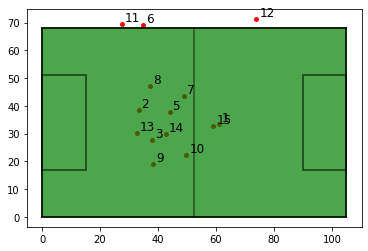

In [4]:
fig, axs = plt.subplots()

plot_background(axs=axs, colorfull=True)

axs.scatter(x=data_pos_mean["x_pos"], y=data_pos_mean["y_pos"], color="red", s=15)

for i, item in data_pos_mean.iterrows():
    axs.annotate(int(item["tag_id"]), (item["x_pos"]+1, item["y_pos"]+1), fontsize=12)

plt.show()

# b

In [5]:
data_pos_std = data.groupby("tag_id").std()[["x_pos", "y_pos"]]
data_pos_std = data_pos_std.reset_index()

In [50]:
data_cov = data.groupby("tag_id").cov().reset_index()
data_cov = data_cov[(data_cov["level_1"]=="x_pos") | (data_cov["level_1"]=="y_pos")]   
data_cov = data_cov[["tag_id","level_1","x_pos", "y_pos"]]

In [56]:
def cov_matrix(tag_id):
    data_cov_id = data_cov[data_cov["tag_id"]==tag_id]
    return np.array([[data_cov_id.iloc[0]["x_pos"], data_cov_id.iloc[0]["y_pos"]], [data_cov_id.iloc[1]["x_pos"], data_cov_id.iloc[1]["y_pos"]]])

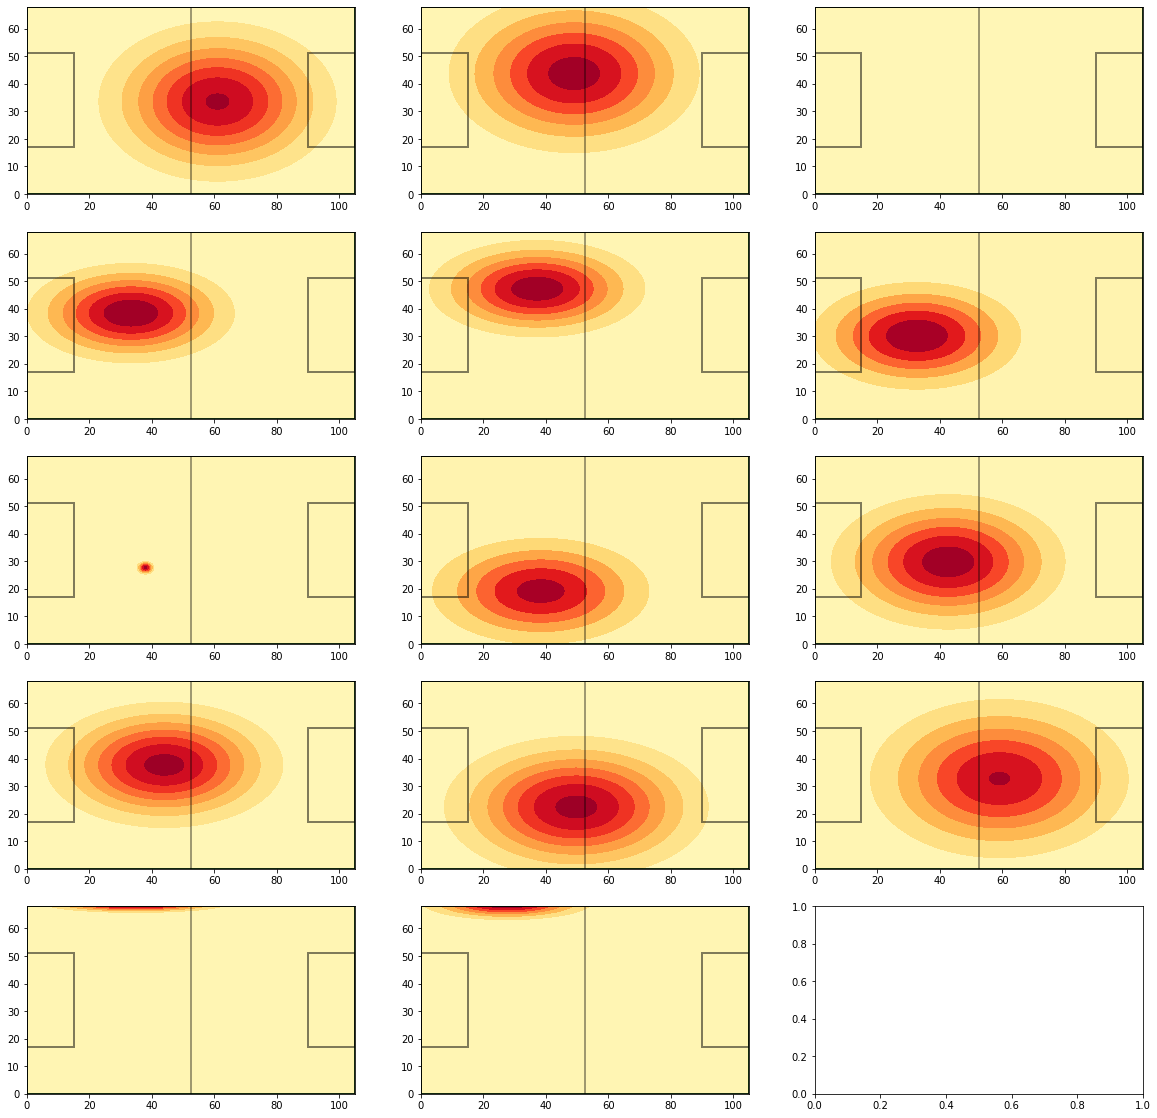

In [19]:
import numpy as np
size = 1000

fig, axs = plt.subplots(5, 3)

for i, item in data_pos_std.iterrows():
    plot_background(axs=axs[i%5][int(i/5)], colorfull=False)

    sigma_x = item["x_pos"]
    sigma_y = item["y_pos"]
    
    mean_x = data_pos_mean.iloc[i]["x_pos"]
    mean_y = data_pos_mean.iloc[i]["y_pos"]


    x = np.linspace(0, 105, size)
    y = np.linspace(0, 68, size)
    
    x, y = np.meshgrid(x, y)
    z = (1/(2*np.pi*sigma_x*sigma_y) * np.exp(-((x-mean_x)**2/(2*sigma_x**2)
         + (y-mean_y)**2/(2*sigma_y**2))))

    axs[i%5][int(i/5)].contourf(x, y, z, cmap="YlOrRd")
#     plt.colorbar()
fig.set_size_inches(20,20)
plt.show()

1.0
[[0.00057493]]
(60.96096096096096, 33.55755755755756)
[[0.00057493]]
2.0
[[0.00102396]]
(33.31831831831832, 38.390390390390394)
[[0.00102396]]
3.0
[[0.11654394]]
(37.94294294294294, 27.635635635635637)
[[0.11654843]]
5.0
[[0.00073907]]
(43.933933933933936, 37.70970970970971)
[[0.00073907]]
6.0
[[0.00844433]]
(42.77777777777778, 68.0)
[[0.01089606]]
7.0
[[0.00053721]]
(49.08408408408408, 43.69969969969971)
[[0.00053721]]
8.0
[[0.00101454]]
(37.312312312312315, 47.23923923923925)
[[0.00101455]]
9.0
[[0.00089836]]
(38.36336336336336, 19.195195195195197)
[[0.00089837]]
10.0
[[0.00059179]]
(49.81981981981982, 22.462462462462465)
[[0.00059179]]
11.0
[[0.00351116]]
(29.744744744744747, 68.0)
[[0.00393791]]
12.0
[[5.73505871e-17]]
(83.45345345345346, 68.0)
[[4.53562239]]
13.0
[[0.00087556]]
(32.792792792792795, 30.154154154154156)
[[0.00087556]]
14.0
[[0.0006712]]
(42.77777777777778, 29.745745745745747)
[[0.0006712]]
15.0
[[0.00048637]]
(59.06906906906907, 32.74074074074074)
[[0.00048637]]

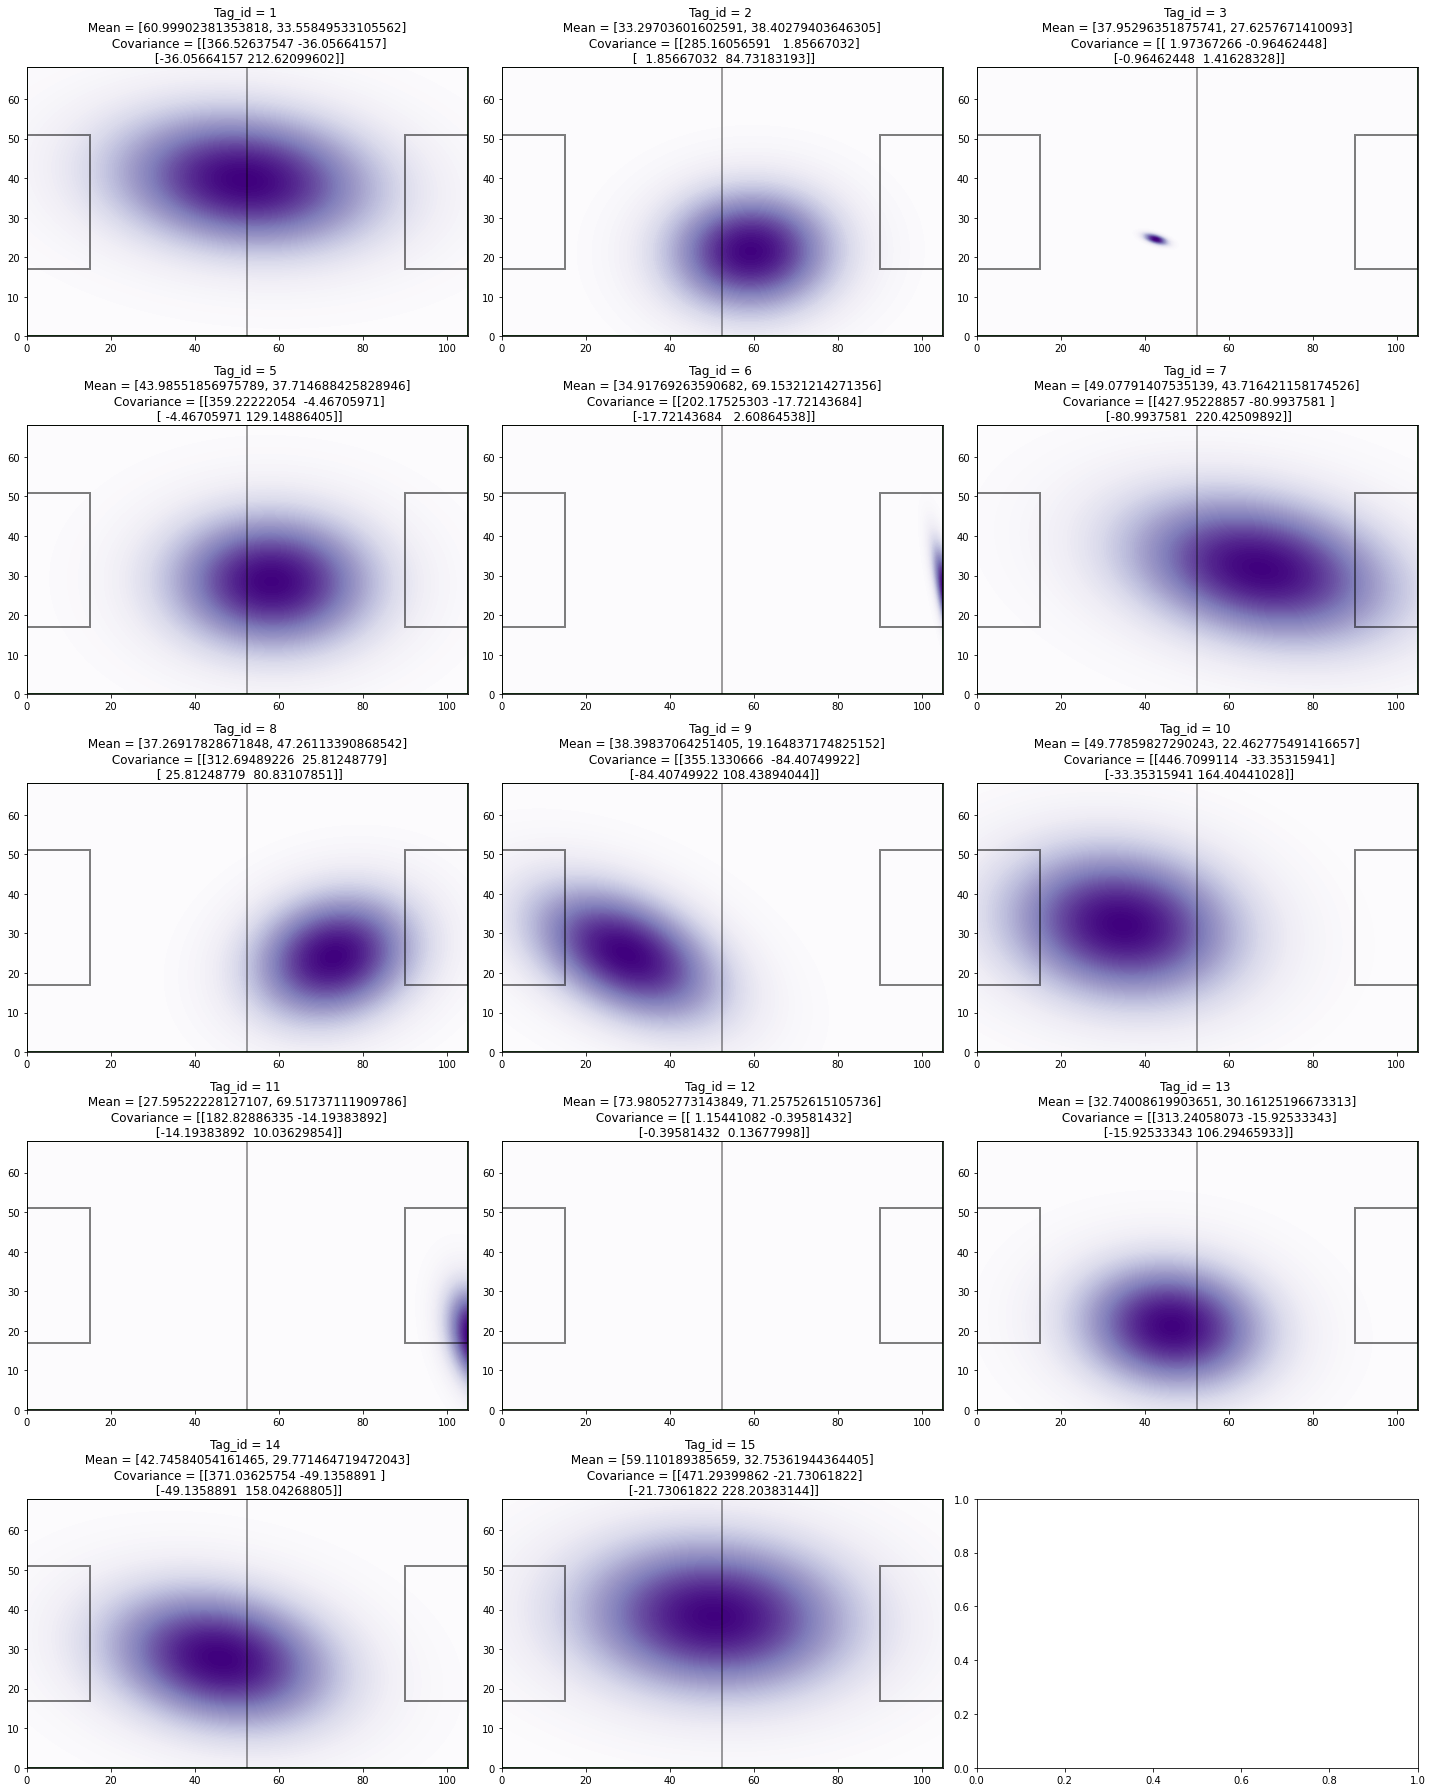

In [135]:
import numpy as np
size = 1000

fig, axs = plt.subplots(5, 3)

for i, item in data_pos_mean.iterrows():

    x = np.linspace(0, 105, size)
    y = np.linspace(0, 68, size)
    
    mean_x = item["x_pos"]
    mean_y = item["y_pos"]
    tag_id = item["tag_id"]
    
    sigma = cov_matrix(tag_id=tag_id)
    
    sigma_inv = np.linalg.inv(sigma)
    sigma_det = np.linalg.det(sigma)
    
    z = []
    maxim = 0
    maxim_arg = None
    for xi in x:
        zi = []
        for yi in y:
            xy_sub_mean = np.array([[xi-mean_x], [yi-mean_y]])        
            zij = np.exp(-1/2 * xy_sub_mean.T @ sigma_inv @ xy_sub_mean) / (2 * np.pi * np.sqrt(sigma_det))
            if zij > maxim:
                maxim = zij
                maxim_arg = (xi, yi)
            zi.append(float(zij))
            
        z.append(zi)
            
    z = np.array(z)
    print(tag_id)
    print(maxim)
    print(maxim_arg)
    xy_sub_mean = np.array([[mean_x-mean_x], [mean_y-mean_y]])        
    zij = np.exp(-1/2 * xy_sub_mean.T @ sigma_inv @ xy_sub_mean) / (2 * np.pi * np.sqrt(sigma_det))        
    print(zij)
    
    x, y = np.meshgrid(x, y)
#     z = (1/(2*np.pi*sigma_x*sigma_y) * np.exp(-((x-mean_x)**2/(2*sigma_x**2)
#          + (y-mean_y)**2/(2*sigma_y**2))))

    plot_background(axs=axs[int(i/3)][i%3], colorfull=False)

#     axs[int(i/3)][i%3].contourf(x, y, z, 100, cmap="YlOrRd")
    axs[int(i/3)][i%3].contourf(x, y, z, 100, cmap="Purples")
    axs[int(i/3)][i%3].title.set_text(f"Tag_id = {int(tag_id)} \n Mean = {[mean_x, mean_y]} \n Covariance = {sigma}")    

#     break
fig.set_size_inches(20,25)
fig.tight_layout()
plt.show()